### CHURN PREDICTION
Customer Churn is when customers leave a service in a given period of time, what is bad for business. This work has as objective to build a machine learning model to predict which customers will leave the service and the dataset used is the Telco Customer Churn, hosted at Kaggle. An Exploratory Data Analysis is made to a better understand the data.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   
from scipy import stats

In [3]:
df =pd.read_excel("../Telco-Customer-Churn.xlsx")
df_=pd.read_excel("../Telco-Customer-Churn.xlsx")

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,Yes


In [5]:
df.iloc[:5,-3:]

,MonthlyCharges,TotalCharges,Churn
0,29.85,29.85,No
1,56.95,1889.5,No
2,53.85,108.15,Yes
3,42.3,1840.75,No
4,70.7,151.65,Yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        7043 non-null   object
 1   gender            7043 non-null   object
 2   SeniorCitizen     7043 non-null   int64 
 3   Partner           7043 non-null   object
 4   Dependents        7043 non-null   object
 5   tenure            7043 non-null   int64 
 6   PhoneService      7043 non-null   object
 7   MultipleLines     7043 non-null   object
 8   InternetService   7043 non-null   object
 9   OnlineSecurity    7043 non-null   object
 10  OnlineBackup      7043 non-null   object
 11  DeviceProtection  7043 non-null   object
 12  TechSupport       7043 non-null   object
 13  StreamingTV       7043 non-null   object
 14  StreamingMovies   7043 non-null   object
 15  Contract          7043 non-null   object
 16  PaperlessBilling  7043 non-null   object
 17  PaymentMethod 

In [7]:
df.describe() # show base statics for numeric columns

,SeniorCitizen,tenure
count,7043.000000,7043.000000
mean,0.162147,32.371149
std,0.368612,24.559481
min,0.000000,0.000000
25%,0.000000,9.000000
50%,0.000000,29.000000
75%,0.000000,55.000000
max,1.000000,72.000000


In [8]:
df.loc[df.Churn=="No","Churn"]=0
df.loc[df.Churn=="Yes","Churn"]=1

df.head() 


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,1


In [9]:
df["Churn"].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [10]:
df.value_counts("Churn")

Churn
0    5174
1    1869
dtype: int64

In [32]:
df.groupby([df.gender,df.Churn]).count()["customerID"]

gender  Churn
Female  0        2549
        1         939
Male    0        2625
        1         930
Name: customerID, dtype: int64

In [33]:
df_.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,Yes


### CHURN DISTRIBUTION
The Client Churn Distribution is checked for any imbalance, as the feature is the target, it's important to choose what strategy to adopt when dealing with imbalanced classes. Below, a Pie Chart shows the feature distribution.

In [34]:
df_.dtypes[df_.dtypes=="object"] # Returns columns whose column values are objects

customerID          object
gender              object
Partner             object
Dependents          object
PhoneService        object
MultipleLines       object
InternetService     object
OnlineSecurity      object
OnlineBackup        object
DeviceProtection    object
TechSupport         object
StreamingTV         object
StreamingMovies     object
Contract            object
PaperlessBilling    object
PaymentMethod       object
MonthlyCharges      object
TotalCharges        object
Churn               object
dtype: object

In [35]:
df_.dtypes[df_.dtypes!="object"]# Returns columns whose column values are non objects

SeniorCitizen    int64
tenure           int64
dtype: object

In [36]:
df_.dtypes[df_.dtypes!="object"].index

Index(['SeniorCitizen', 'tenure'], dtype='object')

In [51]:
df_.dtypes[df_.dtypes!="object"].values

array([dtype('int64'), dtype('int64')], dtype=object)

In [52]:
char_cols=df.dtypes.pipe(lambda x: x[x=="object"] ).index
type(char_cols)


pandas.core.indexes.base.Index

In [53]:
for col in char_cols:
    print(col,"---",
          df.columns.get_loc(col),"--",type(col))

customerID --- 0 -- <class 'str'>
gender --- 1 -- <class 'str'>
Partner --- 3 -- <class 'str'>
Dependents --- 4 -- <class 'str'>
PhoneService --- 6 -- <class 'str'>
MultipleLines --- 7 -- <class 'str'>
InternetService --- 8 -- <class 'str'>
OnlineSecurity --- 9 -- <class 'str'>
OnlineBackup --- 10 -- <class 'str'>
DeviceProtection --- 11 -- <class 'str'>
TechSupport --- 12 -- <class 'str'>
StreamingTV --- 13 -- <class 'str'>
StreamingMovies --- 14 -- <class 'str'>
Contract --- 15 -- <class 'str'>
PaperlessBilling --- 16 -- <class 'str'>
PaymentMethod --- 17 -- <class 'str'>
MonthlyCharges --- 18 -- <class 'str'>
TotalCharges --- 19 -- <class 'str'>
Churn --- 20 -- <class 'str'>


In [43]:
df.columns,

(Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
        'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
        'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
        'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
       dtype='object'),)

In [44]:
df.index

RangeIndex(start=0, stop=7043, step=1)

In [45]:

pd.factorize(df["SeniorCitizen"])

(array([0, 0, 0, ..., 0, 1, 0], dtype=int64),
 Int64Index([0, 1], dtype='int64'))

In [55]:

np.unique(pd.factorize(df["SeniorCitizen"])[0],
                            return_counts=True)


(array([0, 1], dtype=int64), array([5901, 1142], dtype=int64))

In [48]:
from collections import Counter
Counter(pd.factorize(df["SeniorCitizen"])[0])

Counter({0: 5901, 1: 1142})

In [49]:
char_cols

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'],
      dtype='object')

In [17]:
for c in char_cols :  # we doing change  each uniqe categorical columns value to integer vlaue .actually we perform label encoder
    df[c]= pd.factorize(df[c])[0]
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,1,0,34,1,1,0,1,...,1,0,0,0,1,1,1,1,1,0
2,2,1,0,1,0,2,1,1,0,1,...,0,0,0,0,0,0,1,2,2,1
3,3,1,0,1,0,45,0,0,0,1,...,1,1,0,0,1,1,2,3,3,0
4,4,0,0,1,0,2,1,1,1,0,...,0,0,0,0,0,0,0,4,4,1


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        7043 non-null   object
 1   gender            7043 non-null   object
 2   SeniorCitizen     7043 non-null   int64 
 3   Partner           7043 non-null   object
 4   Dependents        7043 non-null   object
 5   tenure            7043 non-null   int64 
 6   PhoneService      7043 non-null   object
 7   MultipleLines     7043 non-null   object
 8   InternetService   7043 non-null   object
 9   OnlineSecurity    7043 non-null   object
 10  OnlineBackup      7043 non-null   object
 11  DeviceProtection  7043 non-null   object
 12  TechSupport       7043 non-null   object
 13  StreamingTV       7043 non-null   object
 14  StreamingMovies   7043 non-null   object
 15  Contract          7043 non-null   object
 16  PaperlessBilling  7043 non-null   object
 17  PaymentMethod 

In [75]:
df.groupby("gender").describe().iloc[:,:8]

SeniorCitizen                                             
               count      mean       std  min  25%  50%  75%  max
gender                                                           
Female        3488.0  0.162844  0.369276  0.0  0.0  0.0  0.0  1.0
Male          3555.0  0.161463  0.368009  0.0  0.0  0.0  0.0  1.0

In [83]:
df.groupby("gender").describe()[:2]

SeniorCitizen                                               tenure  \
               count      mean       std  min  25%  50%  75%  max   count   
gender                                                                      
Female        3488.0  0.162844  0.369276  0.0  0.0  0.0  0.0  1.0  3488.0   
Male          3555.0  0.161463  0.368009  0.0  0.0  0.0  0.0  1.0  3555.0   

                                                          
             mean        std  min  25%   50%   75%   max  
gender                                                    
Female  32.244553  24.463233  0.0  9.0  29.0  55.0  72.0  
Male    32.495359  24.656359  0.0  9.0  29.0  56.0  72.0

In [87]:

df.groupby("gender").mean()

,SeniorCitizen,tenure
gender,,
Female,0.162844,32.244553
Male,0.161463,32.495359


In [88]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.8,1990.5,0
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.2,7362.9,0
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,2021-06-29 00:00:00,346.45,0
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.4,306.6,1


### EXPLORATORY DATA ANALYSIS
Exploratory Data Analysis The goal of this section is to understand with our data. We will do bivariate analysis. We'll examine how each variable relates to the churn rate. 

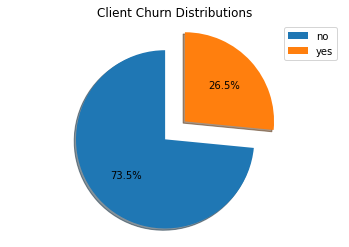

In [89]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels="no","yes"
sizes=[5174,1869]
explode = (0, 0.3)  # only "explode" the 2nd slice (i.e. 'yes')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title("Client Churn Distributions")
ax1.legend(labels)
plt.show()

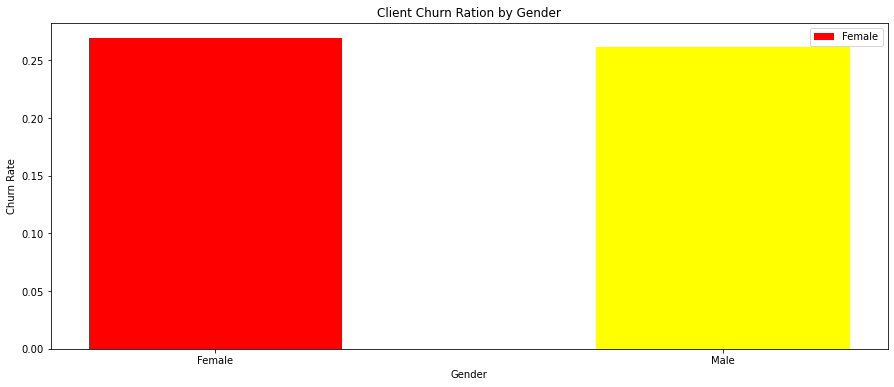

In [23]:
# create a dataset
Churn_Mean = [0.269209, 0.261603]
Gender = ('Female', 'Male')
x_pos = np.arange(len(Churn_Mean))

# Create bars with different colors
plt.figure(figsize=(15,6))
plt.bar(x_pos, Churn_Mean,width=0.5, color=['red','yellow'])

# Create names on the x-axis
plt.xticks(x_pos, Gender)

# Add title and axis names
plt.title('Client Churn Ration by Gender')
plt.xlabel('Gender')
plt.ylabel('Churn Rate')
plt.legend(("Female","Male"))

# Show graph
plt.show()